# Dataset #1 Preprocessing and Exploration

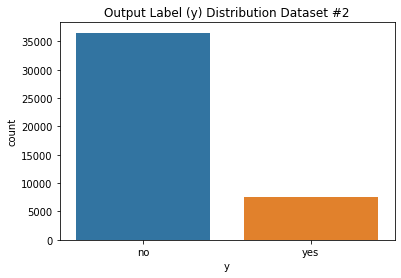

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import seaborn as sns

ds1 = pd.read_csv('./data/adult.data',
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                           'native-country', '<=50k'])
ds1.dropna()
ds1.drop_duplicates()
ds1 = ds1[ds1['workclass'] != '?']
ds1 = ds1[ds1['occupation'] != '?']
ds1 = ds1[ds1['education'] != '?']
ds1 = ds1[ds1['marital-status'] != '?']
ds1 = ds1[ds1['relationship'] != '?']
ds1 = ds1[ds1['race'] != '?']
ds1 = ds1[ds1['sex'] != '?']
ds1 = ds1[ds1['native-country'] != '?']

ax = sns.countplot(x="<=50k", data=ds1).set_title("Output Label (<= $50k/yr) Distribution Dataset #1")

ds2 = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
ds2.dropna()
ds2.drop_duplicates()
ax2 = sns.countplot(x="y", data=ds2).set_title("Output Label (y) Distribution Dataset #2")

Text(0.5, 1.0, 'Correlation Matrix')

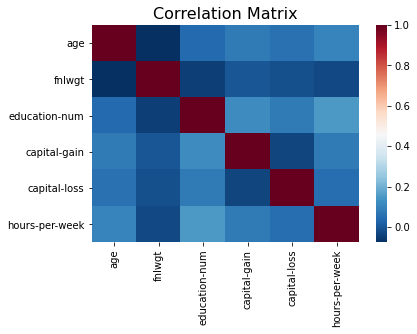

In [2]:
sns.heatmap(ds1.select_dtypes(exclude="object").corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)

In [3]:
ds1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
<=50k             object
dtype: object

In [36]:
ds1_dummies = pd.get_dummies(ds1, columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
ds1_dummies.columns
ds2_dummies = pd.get_dummies(ds2, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
ds2_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [37]:
ds1_dummies.dropna()
ds1_dummies['<=50k'].value_counts()
ds1_dummies['<=50k'] = ds1_dummies['<=50k'].map({'<=50K':1, '>50K': 0})
ds1_labels = ds1_dummies['<=50k']
ds1_dummies = ds1_dummies.drop(['<=50k'], axis=1)
ds1_dummies.columns

ds2_dummies.dropna()
ds2_dummies['y'].value_counts()
ds2_dummies['y'] = ds2_dummies['y'].map({'yes':1, 'no': 0})
ds2_labels = ds2_dummies['y']
ds2_dummies = ds2_dummies.drop(['y'], axis=1)
ds2_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds1_dummies, ds1_labels, test_size=0.20, stratify=ds1_labels)
X1_train, X1_test, y1_train, y1_test = train_test_split(ds2_dummies, ds2_labels, test_size=0.20, stratify=ds2_labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  24129
number of test samples:  6033


In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
pipe_steps = [('scaler', StandardScaler()), ('tree', DecisionTreeClassifier(random_state=0))]

check_params = {'tree__criterion':['gini', 'entropy'], 
                'tree__splitter': ['best', 'random'],
                'tree__ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025],
               'tree__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(random_state=0))])


In [8]:
from tqdm import tqdm_notebook as tqdm
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv, n_jobs=6)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %5.4f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)
    

print ("out o' the loop")


start fitting the data


score for 3 fold CV := 0.8543
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alpha': 0.0001, 'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__splitter': 'best'}
score for 4 fold CV := 0.8485
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alpha': 0.0001, 'tree__criterion': 'gini', 'tree__max_depth': 6, 'tree__splitter': 'best'}
score for 5 fold CV := 0.8478
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alpha': 0.0001, 'tree__criterion': 'gini', 'tree__max_depth': 7, 'tree__splitter': 'best'}
score for 6 fold CV := 0.8495
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alpha': 0.0001, 'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__splitter': 'best'}
score for 7 fold CV := 0.8495
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alpha': 0.0001, 'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__splitter': 'best'}
score for 8 fold CV := 0.8472
!!!! best fit parameters from GridSearchCV !!!!
{'tree__ccp_alph

In [11]:
%%time
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=7, splitter='best', ccp_alpha=0.0001)
DecsTree.fit(X_train, y_train)

y_pred_train = DecsTree.predict(X_train)
y_pred_test = DecsTree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('training data confusion matrix')
print(conf_matrix_train)
print('testing data confusion matrix')
print(conf_matrix_test)

print('training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

training data confusion matrix
      0      1
0  3333   2673
1   841  17282
testing data confusion matrix
     0     1
0  817   685
1  233  4298
training accuracy rate: 0.8543661154627212
test accuracy rate: 0.8478368970661363
training error rate: 0.14563388453727877
test error rate: 0.1521631029338637
training matthews_corrcoef Score: 0.5813406386502898
test matthews_corrcoef score: 0.5617122688839803
CPU times: user 170 ms, sys: 8.98 ms, total: 179 ms
Wall time: 178 ms


In [54]:
#from matplotlib.pyplot import figure
#figure(figsize=(80,60))
#tree.plot_tree(DecsTree, filled=True)


In [55]:
#from sklearn.tree import export_graphviz
#export_graphviz(DecsTree, out_file='tree_limited.dot',
#                rounded = True, proportion = False, precision = 2, filled = True)

In [56]:
#X_train

In [57]:
#from sklearn.model_selection import learning_curve
#import math
#cv = 5
#factor= (cv - 1)/cv
#ts = math.floor(X_train.shape[0]*factor)


#train_sizes, train_scores, valid_scores = learning_curve(
#    DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', ccp_alpha=0.001), X_train, y_train, train_sizes=np.arange(1,ts,1000), cv=cv)



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, estimator1, title, X, y, X1, y1, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(15, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    train_sizes1, train_scores1, test_scores1, fit_times1, _ = \
        learning_curve(estimator1, X1, y1, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean1 = np.mean(train_scores, axis=1)
    train_scores_std1 = np.std(train_scores, axis=1)
    test_scores_mean1 = np.mean(test_scores, axis=1)
    test_scores_std1 = np.std(test_scores, axis=1)
    fit_times_mean1 = np.mean(fit_times, axis=1)
    fit_times_std1 = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    #axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
    #                     train_scores_mean + train_scores_std, alpha=0.1,
    #                     color="r")
    #axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
    #                     test_scores_mean + test_scores_std, alpha=0.1,
    #                     color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score Dataset 1")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score Dataset 1")
    axes[0].legend(loc="best")
    
    axes[0].plot(train_sizes1, train_scores_mean1, 'o-', color="b", label="Training score Dataset 2")
    axes[0].plot(train_sizes1, test_scores_mean1, 'o-', color="y", label="Cross-validation score Dataset 2")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit Time in Seconds")
    axes[1].set_title("Scalability of the model")
    
    axes[1].plot(train_sizes1, fit_times_mean1, 'o-')

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].plot(fit_times_mean1, test_scores_mean1, 'o-')
    axes[2].set_xlabel("Fit Time in Seconds")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt






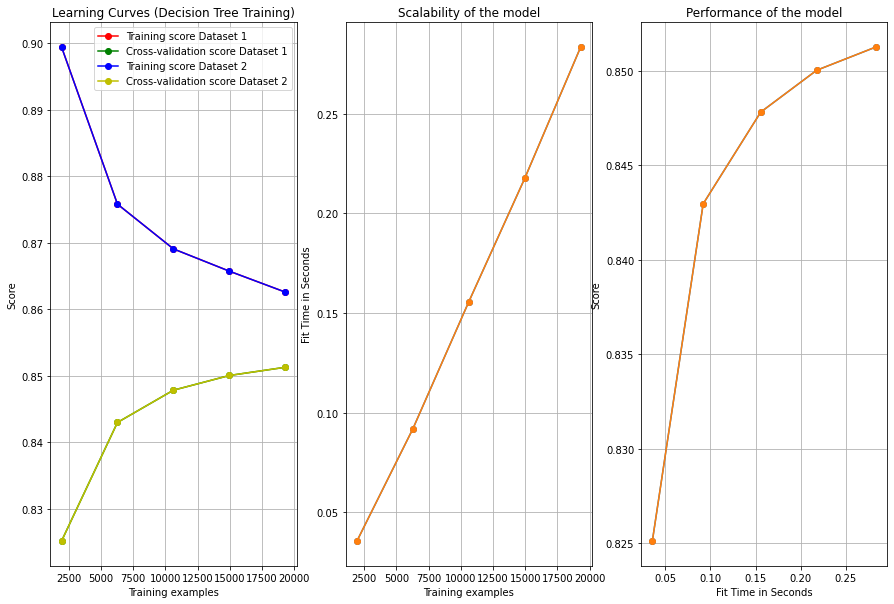

In [44]:
title = "Learning Curves (Decision Tree Training)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion='gini', max_depth=9, splitter='best', ccp_alpha=0.0001)
estimator1 = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best', ccp_alpha=0.0001)


plot_learning_curve(estimator,estimator1, title, X_train, y_train, X1_train, y1_train,cv=cv, n_jobs=-1)


plt.show()

In [46]:
path = estimator.cost_complexity_pruning_path(ds1_dummies, ds1_labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

path1 = estimator1.cost_complexity_pruning_path(ds2_dummies, ds2_labels)
ccp_alphas1, impurities1 = path1.ccp_alphas, path1.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

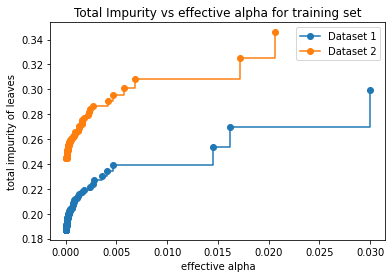

In [48]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", label="Dataset 1")
ax.plot(ccp_alphas1[:-1], impurities1[:-1], marker='o', drawstyle="steps-post", label="Dataset 2")
ax.legend(loc="best")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [49]:
clfs = []
clfs1 = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion='gini', max_depth=9, splitter='best')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

for ccp_alpha1 in ccp_alphas1:
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=7, splitter='best', ccp_alpha=0.0001)
    clf.fit(X1_train, y1_train)
    clfs1.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07418458592523719
Number of nodes in the last tree is: 1 with ccp_alpha: 0.07418458592523719


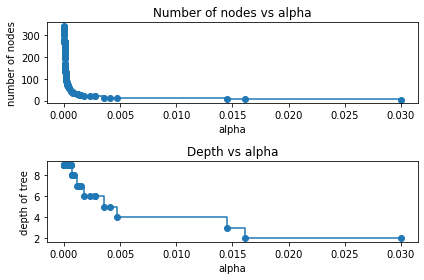

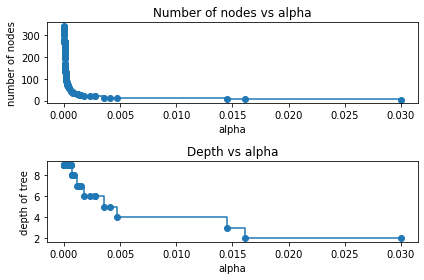

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
clfs1 = clfs1[:-1]
ccp_alphas1 = ccp_alphas1[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

node_counts1 = [clf.tree_.node_count for clf in clfs1]
depth1 = [clf.tree_.max_depth for clf in clfs1]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

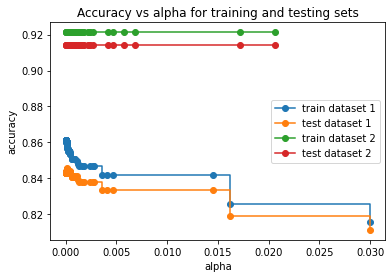

In [51]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores1 = [clf.score(X1_train, y1_train) for clf in clfs1]
test_scores1 = [clf.score(X1_test, y1_test) for clf in clfs1]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train dataset 1",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test dataset 1",
        drawstyle="steps-post")
ax.plot(ccp_alphas1, train_scores1, marker='o', label="train dataset 2",
        drawstyle="steps-post")
ax.plot(ccp_alphas1, test_scores1, marker='o', label="test dataset 2",
        drawstyle="steps-post")
ax.legend()
plt.show()